In [17]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns

EUROandUSD2=pd.read_csv('Book4EuroUSAData.csv')
EUROandUSDDF2=pd.DataFrame(EUROandUSD2)
EUROandUSDDF2
df_panel2 = EUROandUSDDF2


EUROandUSD=pd.read_csv('Book2EUroandUSA.csv')
EUROandUSDDF=pd.DataFrame(EUROandUSD)
EUROandUSDDF
df_panel2a = EUROandUSDDF
df_panel2a
#df_panel2


EUROandUSD3=pd.read_csv('EUROandUSDFileFromJupyter.csv')
EUROandUSDDF3=pd.DataFrame(EUROandUSD3)
EUROandUSDDF3
df_panel3 = EUROandUSDDF3
df_panel3
#df_panel
#df_panel2


EUROandUSD=pd.read_csv('Book5.csv')
EUROandUSDDF=pd.DataFrame(EUROandUSD)
df_panel=EUROandUSDDF
#df_panel
#df_panel2
df_panel=df_panel2


In [18]:
import math
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns

colors_master = ['blue', 'red']

#Define the units (countries) of interest
unit_names = ['Value_USD', 'Value_USD']
unit_names.sort()

colors = colors_master[:len(unit_names)]

unit_col_name='Value Indicator'
time_period_col_name='Year'

#Define the y and X variable names
y_var_name = 'Level'
X_var_names = ['Year','Speech','ECBASSETSW','WALCL']
#Load the panel data set of World Bank published development indicators into a Pandas Dataframe
#df_panel = pd.read_csv('wb_data_panel_2ind_7units_1992_2014.csv', header=0)



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

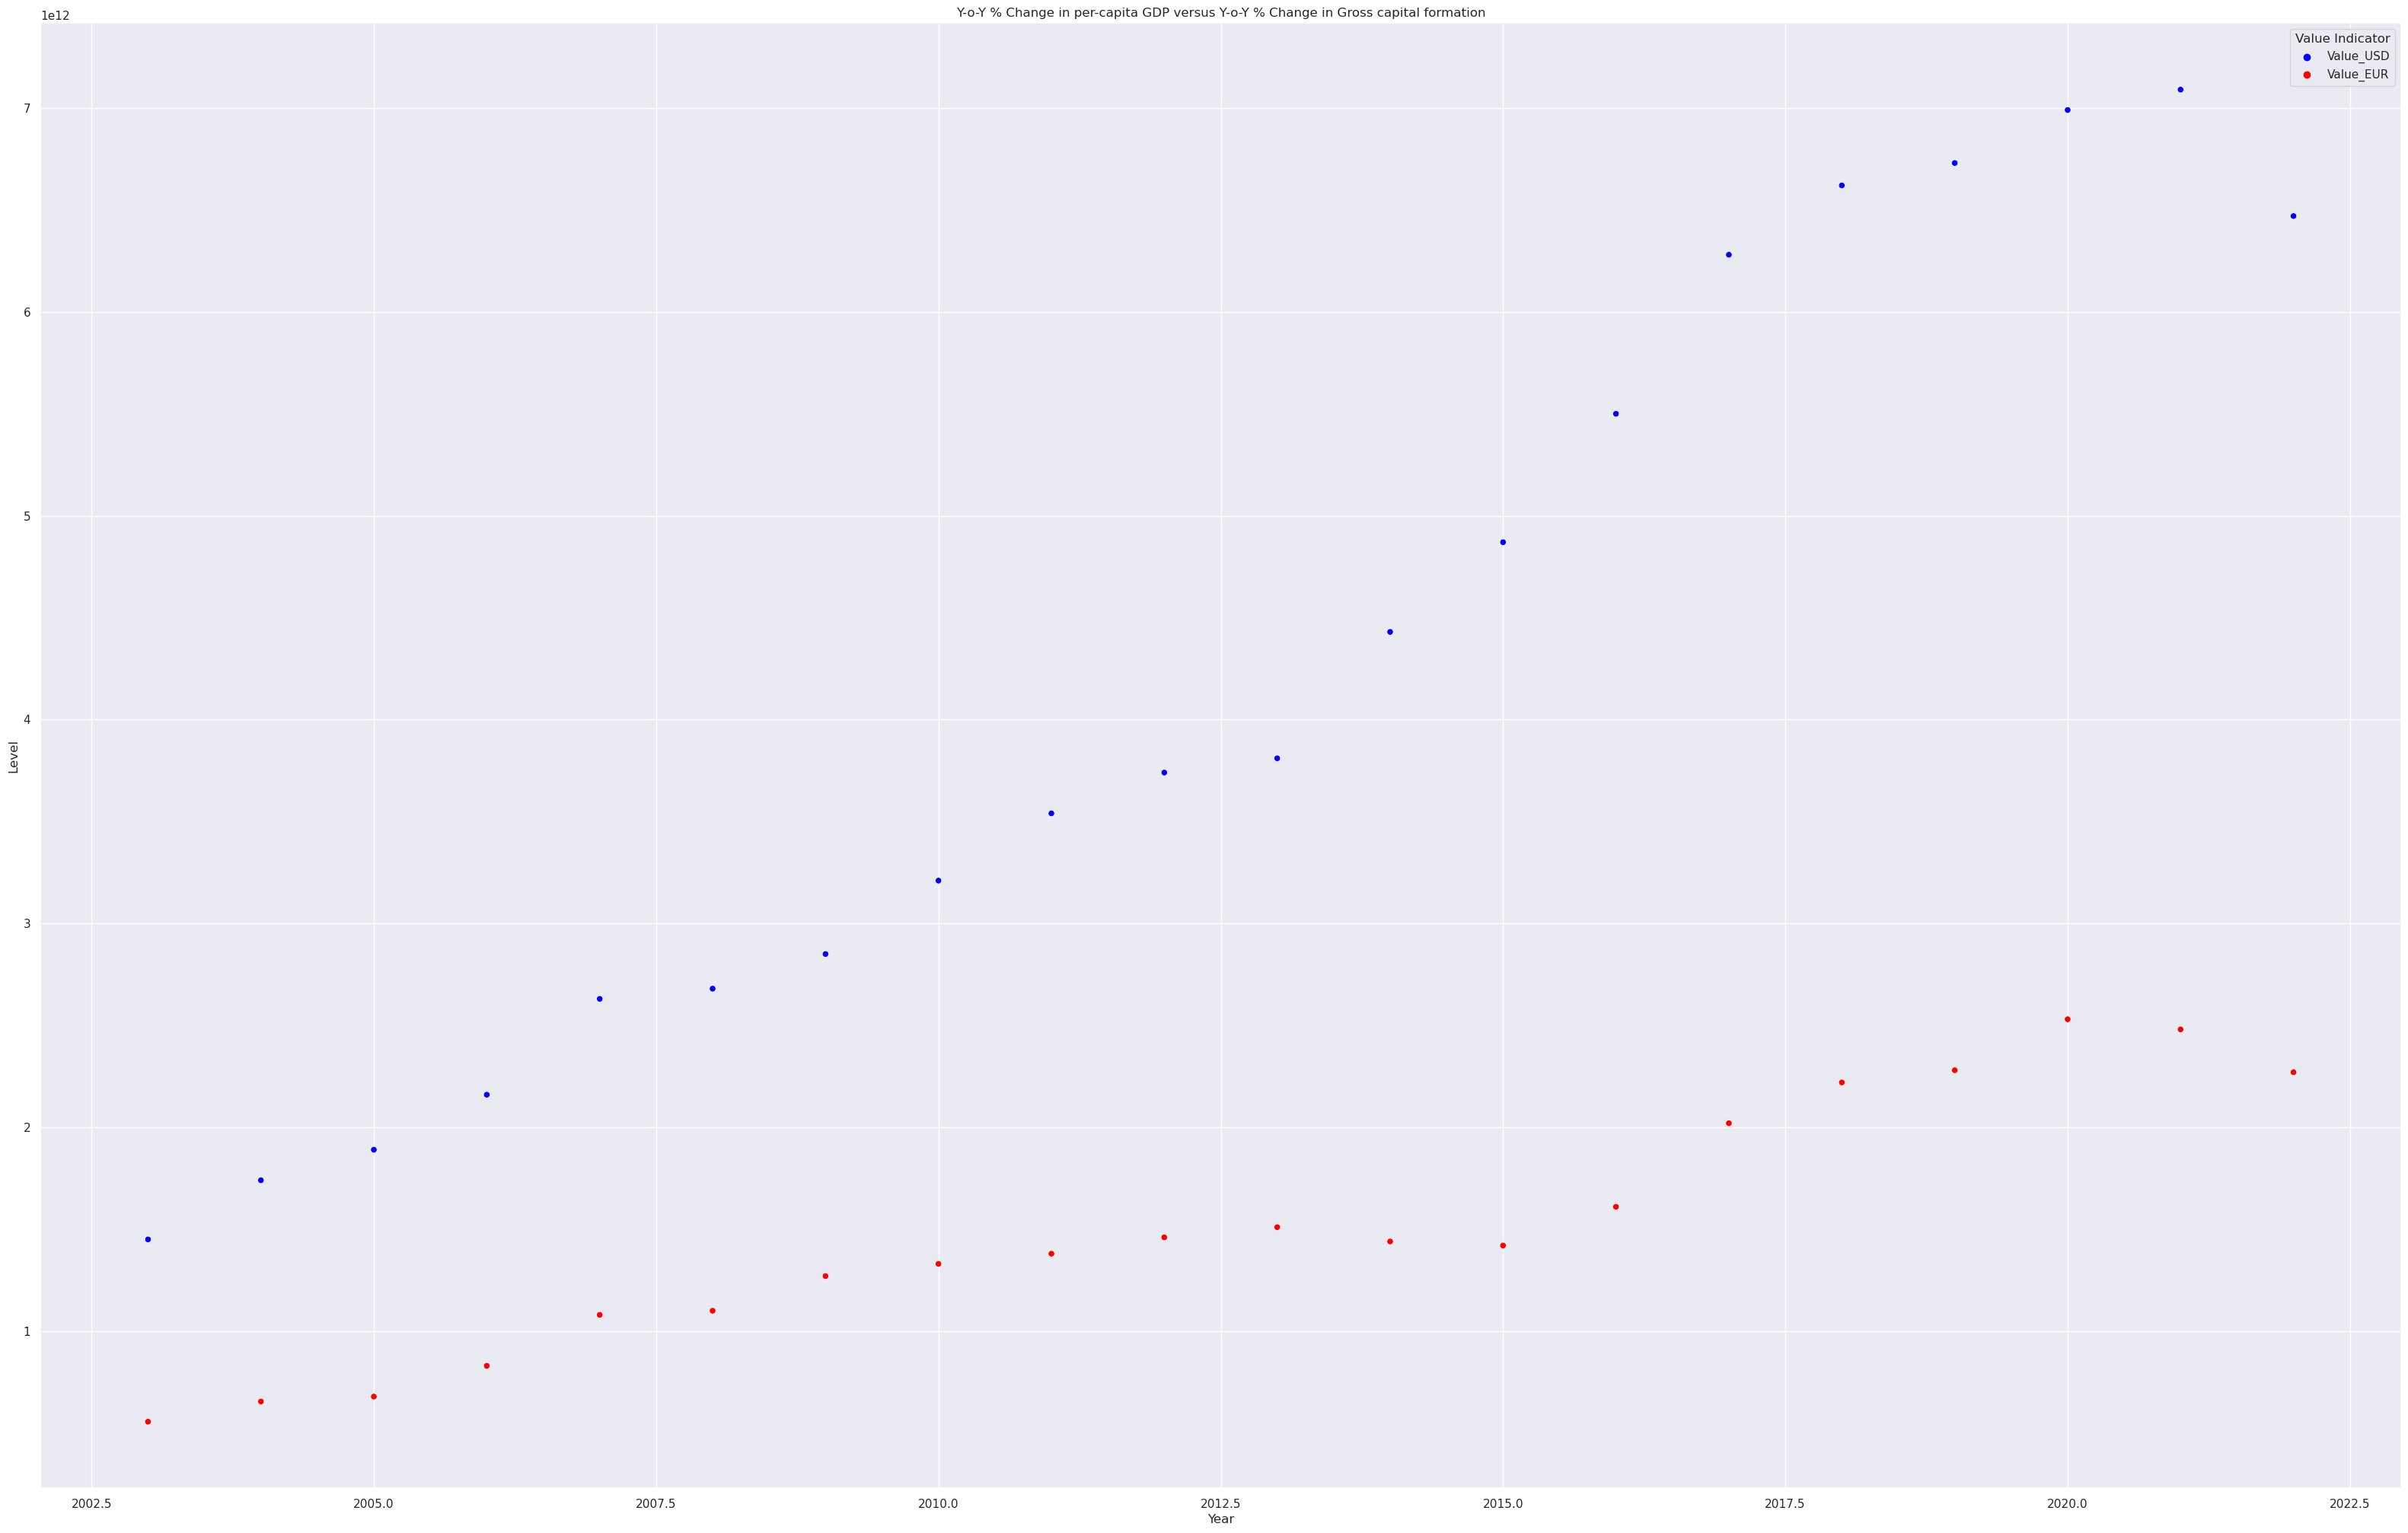

   Value Indicator  ECBASSETSW  Speech  Year    WALCL         Level
0        Value_USD      802000       0  2003   739000  1.450000e+12
1        Value_USD      863000       0  2004   775000  1.740000e+12
2        Value_USD      959000       0  2005   814000  1.890000e+12
3        Value_USD     1090000       0  2006   845000  2.160000e+12
4        Value_USD     1210000       0  2007   873000  2.630000e+12
5        Value_USD     1540000       0  2008  1200000  2.680000e+12
6        Value_USD     1830000       0  2009  2080000  2.850000e+12
7        Value_USD     1950000       0  2010  2320000  3.210000e+12
8        Value_USD     2090000       0  2011  2750000  3.540000e+12
9        Value_USD     2980000       1  2012  2870000  3.740000e+12
10       Value_USD     2510000       1  2013  3480000  3.810000e+12
11       Value_USD     2110000       1  2014  4340000  4.430000e+12
12       Value_USD     2450000       1  2015  4490000  4.870000e+12
13       Value_USD     3190000       1  2016  44

In [20]:
#Setup the variables for performing the calculations of sigma2u and sigma2v

#n=number of groups
n=len(unit_names)

#T=number of time periods per unit
T=df_panel.shape[0]/n

#N=total number of rows in the panel data set
N=n*T

#k=number of regression variables of the Pooled OLS model
k=len(X_var_names)

plot_against_X_index=0

#Use Seaborn to plot GDP growth over all time periods and across all countries versus gross
# capital formation growth:
sns.scatterplot(x=df_panel[X_var_names[plot_against_X_index]], y=df_panel[y_var_name],
                hue=df_panel[unit_col_name], palette=colors).set(title=
                'Y-o-Y % Change in per-capita GDP versus Y-o-Y % Change in Gross capital formation')
plt.show()

#Print out the first 30 rows
print(df_panel.head(30))


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='Year', ylabel='Level'>

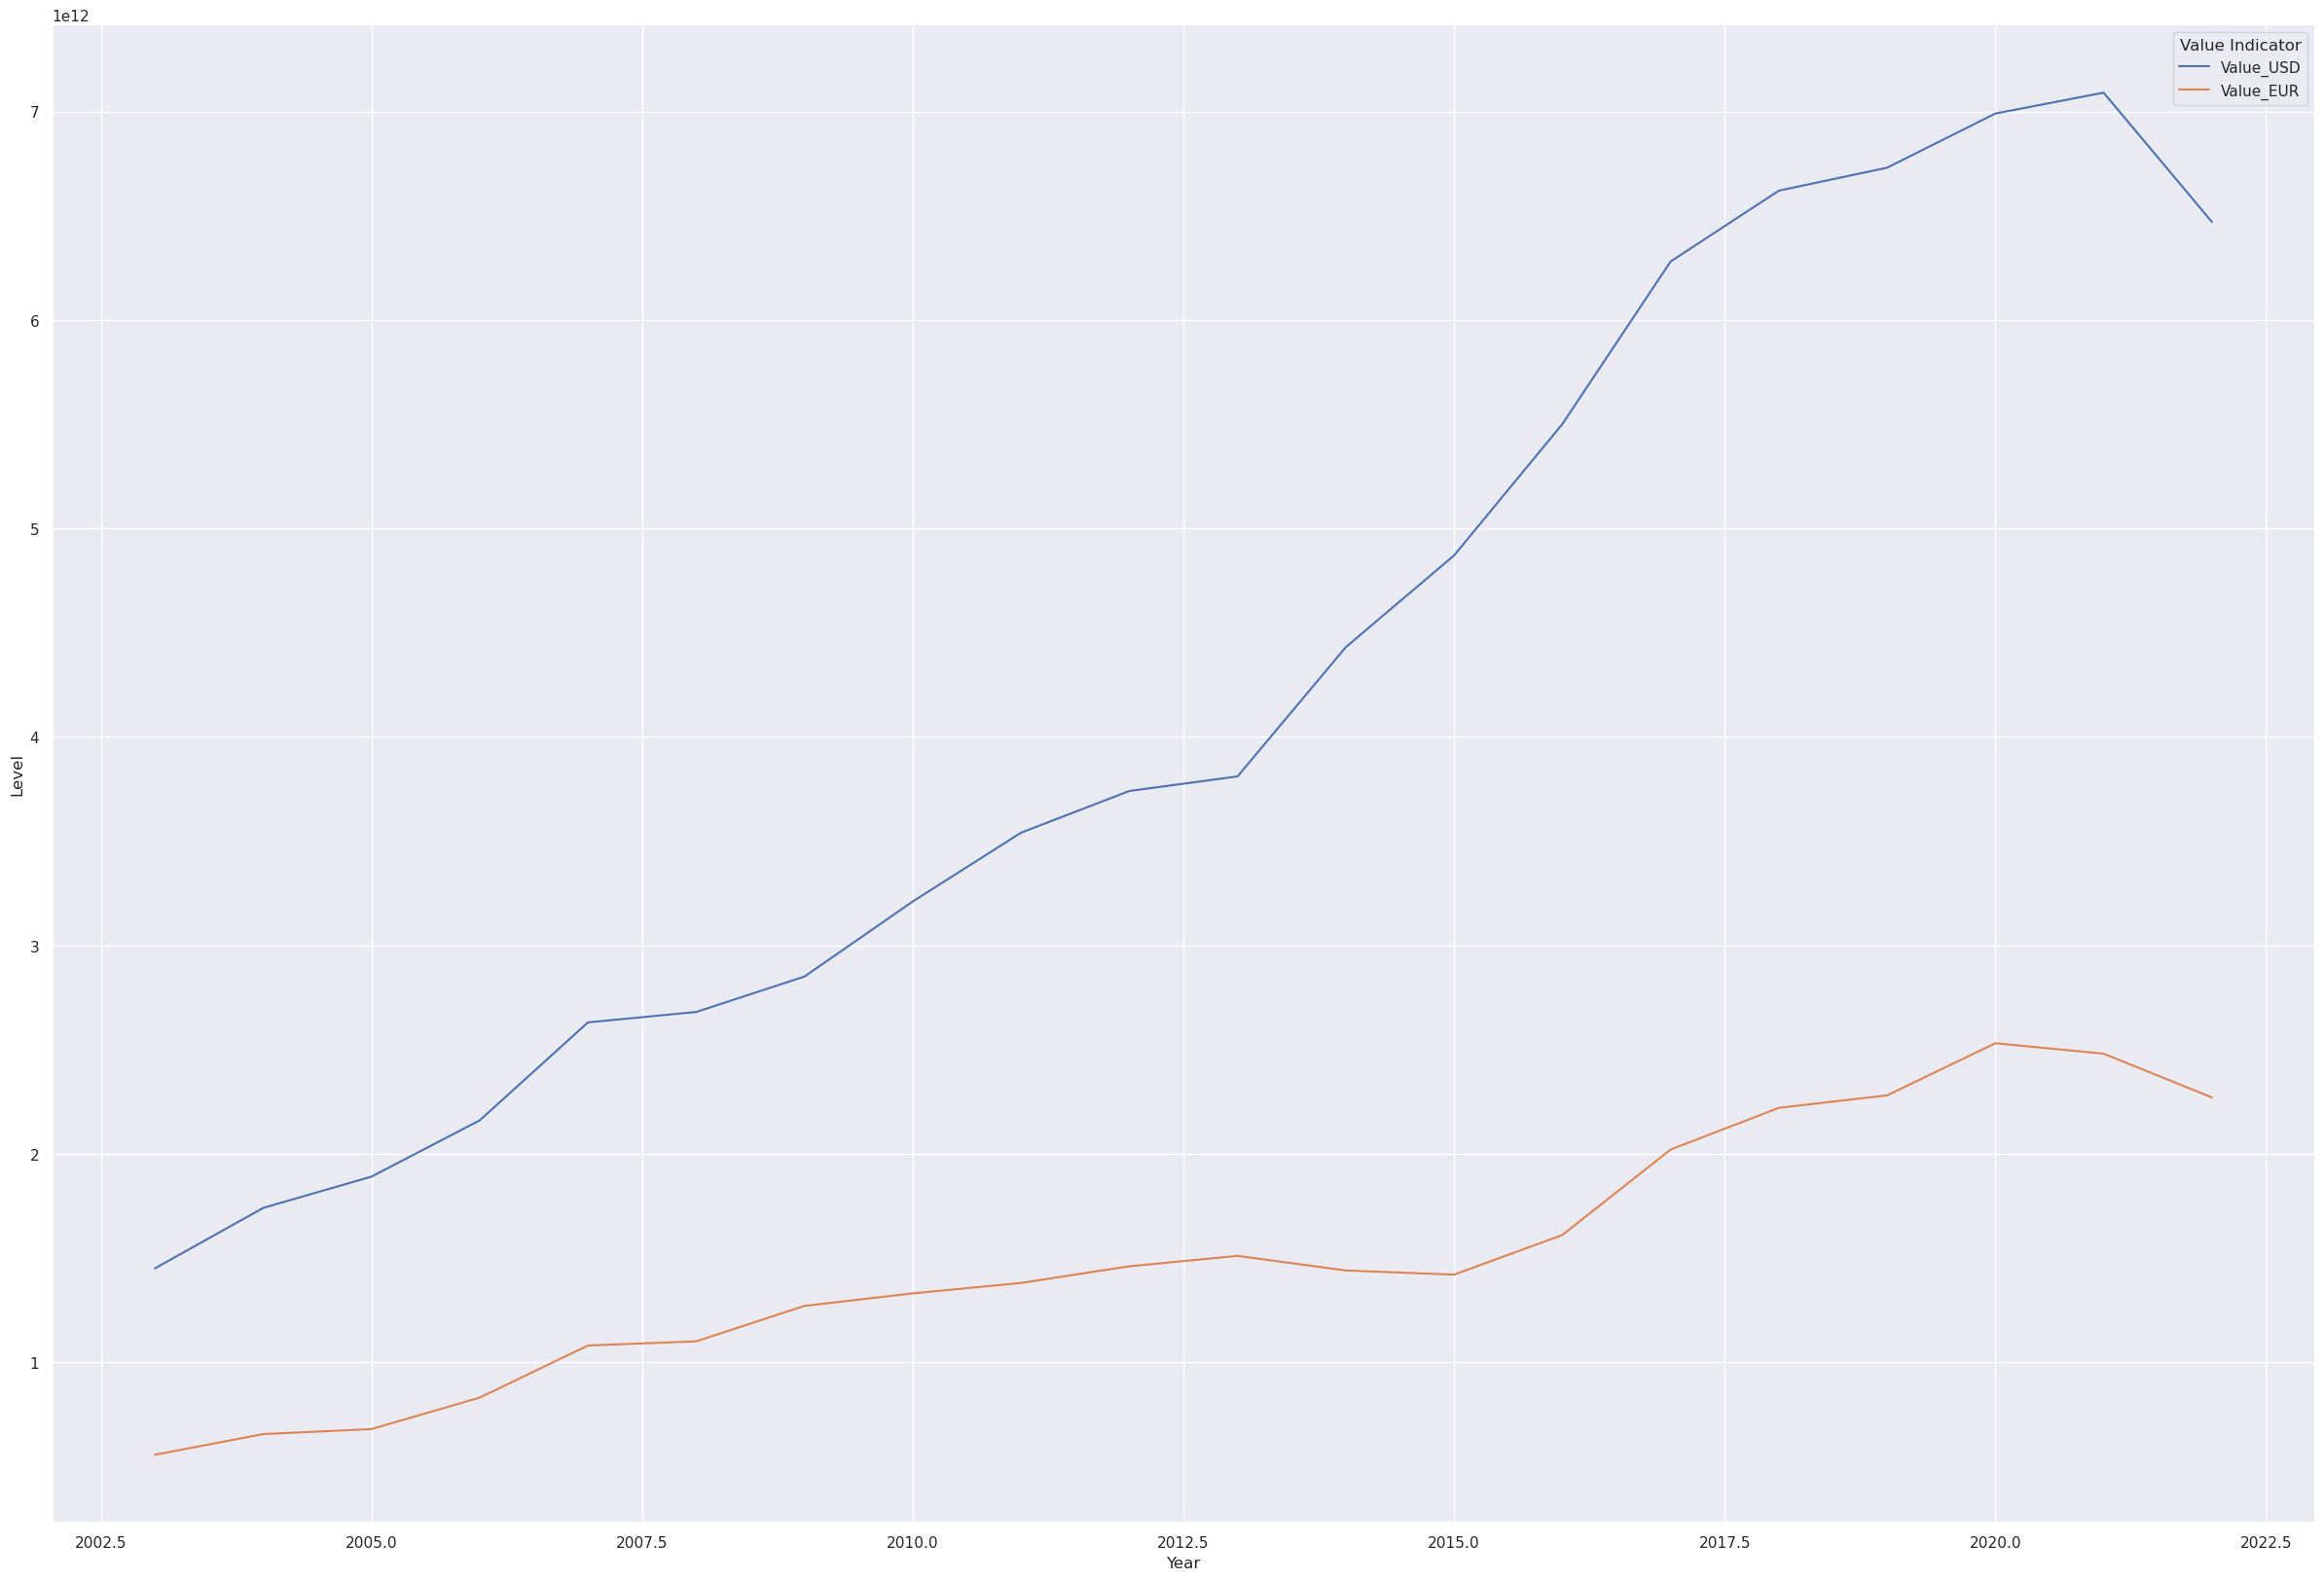

In [21]:
#sns.set(rc={'figure.figsize':(30,20)})
#sns.lineplot(data=df_panel, x="Year", y="Level", hue="Value Indicator")


#re_model_results.resid
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=df_panel, x="Year", y="Level", hue="Value Indicator")


In [22]:

 Estimation procedure for the Random Effects model 

#STEP 1: In this step, using statsmodels, we train a Pooled OLS regression model model on the
# panel data set. The Pooled OLSR model is basically an OLS regression model that is built on the
# flattened version of the panel data set:

pooled_y=df_panel[y_var_name]
pooled_X=df_panel[X_var_names]
pooled_X = sm.add_constant(pooled_X)
pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_X)
pooled_olsr_model_results = pooled_olsr_model.fit()
print('===============================================================================')
print('============================== Pooled OLS Model ===============================')
print(pooled_olsr_model_results.summary())

print('residuals of the \'Pooled OLSR\' model:')
print(pooled_olsr_model_results.resid)




SyntaxError: invalid syntax (2560090988.py, line 1)

In [23]:

#STEP 2: Calculation of variance components σ²_ϵ and σ²_u

#Build and fit a LSDV model on the panel data set so that we can access it's SSE later on
#Create the dummy variables, one for each country
df_dummies = pd.get_dummies(df_panel[unit_col_name])

#Join the dummies Dataframe with the panel data set
df_panel_with_dummies = df_panel.join(df_dummies)

print(df_panel_with_dummies)


   Value Indicator  ECBASSETSW  Speech  Year    WALCL         Level  \
0        Value_USD      802000       0  2003   739000  1.450000e+12   
1        Value_USD      863000       0  2004   775000  1.740000e+12   
2        Value_USD      959000       0  2005   814000  1.890000e+12   
3        Value_USD     1090000       0  2006   845000  2.160000e+12   
4        Value_USD     1210000       0  2007   873000  2.630000e+12   
5        Value_USD     1540000       0  2008  1200000  2.680000e+12   
6        Value_USD     1830000       0  2009  2080000  2.850000e+12   
7        Value_USD     1950000       0  2010  2320000  3.210000e+12   
8        Value_USD     2090000       0  2011  2750000  3.540000e+12   
9        Value_USD     2980000       1  2012  2870000  3.740000e+12   
10       Value_USD     2510000       1  2013  3480000  3.810000e+12   
11       Value_USD     2110000       1  2014  4340000  4.430000e+12   
12       Value_USD     2450000       1  2015  4490000  4.870000e+12   
13    

In [24]:

#Construct the regression equation for the LSDV model. Note that we are leaving out one dummy
# variable so as to avoid perfect multi-colinearity between the 7 dummy variables. The regression
# model's intercept will contain the value of the coefficient for the omitted dummy variable.
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)


Regression expression for OLS with dummies=Level ~ Year + Speech + ECBASSETSW + WALCL + Value_USD


In [25]:

#Build and train the LSDV model
lsdv_model = smf.ols(formula=lsdv_expr, data=df_panel_with_dummies)
lsdv_model_results = lsdv_model.fit()
print(' FE Regression Model')
print(lsdv_model_results.summary())

#Calculate sigma-square-epsilon
sigma2_epsilon = lsdv_model_results.ssr/(n*T-(n+k+1))
print('sigma2_epsilon = ' + str(sigma2_epsilon))

#Calculate sigma-square-pooled
sigma2_pooled = pooled_olsr_model_results.ssr/(n*T-(k+1))
print('sigma2_pooled = ' + str(sigma2_pooled))

#Calculate sigma-square-u
sigma2_u = sigma2_pooled - sigma2_epsilon
print('sigma2_u = ' + str(sigma2_u))

#Calculate theta
theta = 1 - math.sqrt(sigma2_epsilon/(sigma2_epsilon + T*sigma2_u))
print('theta = ' + str(theta))

print('chi2_critical_value='+str(chi2_critical_value))

 FE Regression Model
                            OLS Regression Results                            
Dep. Variable:                  Level   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     49.44
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.23e-14
Time:                        05:06:36   Log-Likelihood:                -1146.6
No. Observations:                  40   AIC:                             2305.
Df Residuals:                      34   BIC:                             2315.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept        

NameError: name 'chi2_critical_value' is not defined

In [26]:



##################################################################################################
#STEP 3: Calculating the means of the y_i and X_i values for each group (i.e. each unit i) in the
# data panel
##################################################################################################
df_panel_group_means = df_panel.groupby(unit_col_name).mean()
#Append a column for storing the regression intercept to this Dataframe. We'll use that column
# in STEP 5:
df_panel_group_means['const'] = 1.0

#Print out the group means
print(df_panel_group_means)


                 ECBASSETSW  Speech    Year      WALCL         Level  const
Value Indicator                                                            
Value_EUR         3070200.0    0.55  2012.5  3398300.0  1.506000e+12    1.0
Value_USD         3070200.0    0.55  2012.5  3398300.0  4.234000e+12    1.0


In [11]:


##################################################################################################
#STEP 4: Calculation of the centered (mean-subtracted) data panel
##################################################################################################

#Prepare the data set for mean centering the y and X columns:
pooled_y_with_unit_name = pd.concat([df_panel[unit_col_name], pooled_y], axis=1)
pooled_X_with_unit_name = pd.concat([df_panel[unit_col_name], pooled_X], axis=1)

#Center each X value using the θ-scaled group-specific mean:
unit_name = ''
for row_index, row in pooled_X_with_unit_name.iterrows():
    for column_name, cell_value in row.items():
        if column_name == unit_col_name:
            unit_name = pooled_X_with_unit_name.at[row_index, column_name]
        else:
            pooled_X_group_mean = df_panel_group_means.loc[unit_name][column_name]
            pooled_X_with_unit_name.at[row_index, column_name] = pooled_X_with_unit_name.at[
                row_index, column_name] - theta*pooled_X_group_mean

#Center each y value using the θ-scaled group-specific mean:
for row_index, row in pooled_y_with_unit_name.iterrows():
    for column_name, cell_value in row.items():
        if column_name == unit_col_name:
            unit_name = pooled_y_with_unit_name.at[row_index, column_name]
        else:
            pooled_y_group_mean = df_panel_group_means.loc[unit_name][column_name]
            pooled_y_with_unit_name.at[row_index, column_name] = pooled_y_with_unit_name.at[
                row_index, column_name] - theta*pooled_y_group_mean
            

pooled_y_group_mean
#pooled_X_group_mean

/tmp/ipykernel_336/2877268923.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '221.8882640154552' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pooled_X_with_unit_name.at[row_index, column_name] = pooled_X_with_unit_name.at[
/tmp/ipykernel_336/2877268923.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.48676345579701846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pooled_X_with_unit_name.at[row_index, column_name] = pooled_X_with_unit_name.at[
/tmp/ipykernel_336/2877268923.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1915202.1127054654' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pooled_X_with_unit_name.at[row_index, column

1506000000000.0

================================== RE Model ===================================
                            OLS Regression Results                            
Dep. Variable:                  Level   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     27.02
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           2.83e-10
Time:                        05:03:19   Log-Likelihood:                -1147.6
No. Observations:                  40   AIC:                             2305.
Df Residuals:                      35   BIC:                             2314.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

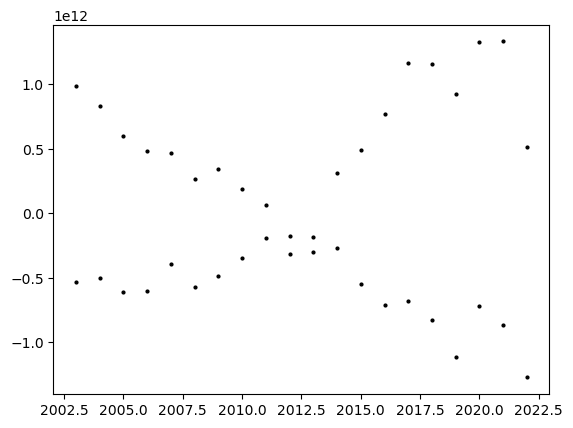

In [11]:

##################################################################################################
#STEP 5: Calculation of the centered (mean-subtracted) data panel
##################################################################################################

#Carve out the y and X matrices:
re_y=pooled_y_with_unit_name[list(pooled_y_with_unit_name.columns[1:])]
re_X=pooled_X_with_unit_name[list(pooled_X_with_unit_name.columns[1:])]

#Build and train the model
re_model = sm.OLS(endog=re_y, exog=re_X)
re_model_results = re_model.fit()

print('===============================================================================')
print('================================== RE Model ===================================')
print(re_model_results.summary())


#Calculate the LM statistic to test for the significance of the Random Effect
df_pooled_olsr_resid_with_unitnames = pd.concat([df_panel[unit_col_name],pooled_olsr_model_results.resid], axis=1)
df_pooled_olsr_resid_group_means = df_pooled_olsr_resid_with_unitnames.groupby(unit_col_name).mean()
ssr_grouped_means=(df_pooled_olsr_resid_group_means[0]**2).sum()
ssr_pooled_olsr=pooled_olsr_model_results.ssr

LM_statistic = (n*T)/(2*(T-1))*math.pow(((T*T*ssr_grouped_means)/ssr_pooled_olsr-1),2)
print('LM Statistic='+str(LM_statistic))

alpha=0.05
chi2_critical_value=st.chi2.ppf(q=(1.0-alpha), df=1)


fig, ax = plt.subplots()



ax.scatter(pooled_X[X_var_names[0]], re_model_results.resid, s=4, c='black', label='Residual Error')

<Axes: xlabel='Year', ylabel='Level'>

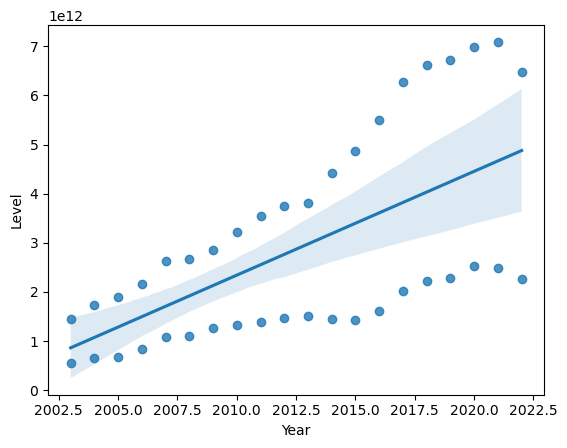

In [12]:
sns.regplot(x="Year", y="Level", data=df_panel)

<Axes: xlabel='Speech', ylabel='Level'>

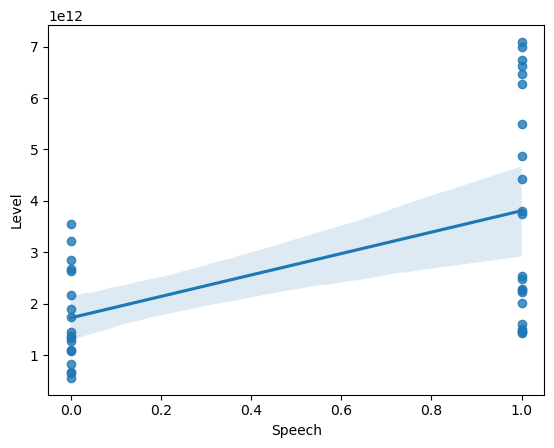

In [13]:
sns.regplot(x="Speech", y="Level", data=df_panel)

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


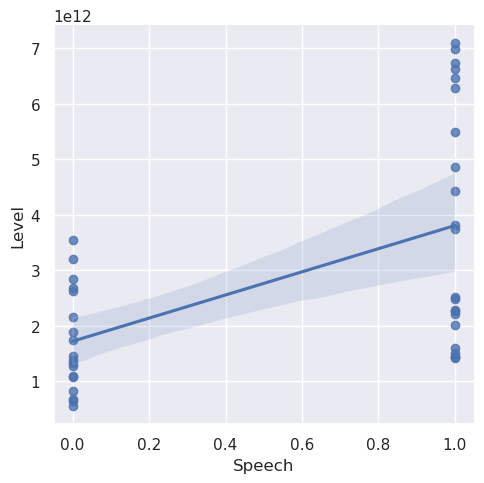

In [16]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
#penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df_panel,
    x="Speech", y="Level",
    height=5
)

# Use more informative axis labels than are provided by default


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


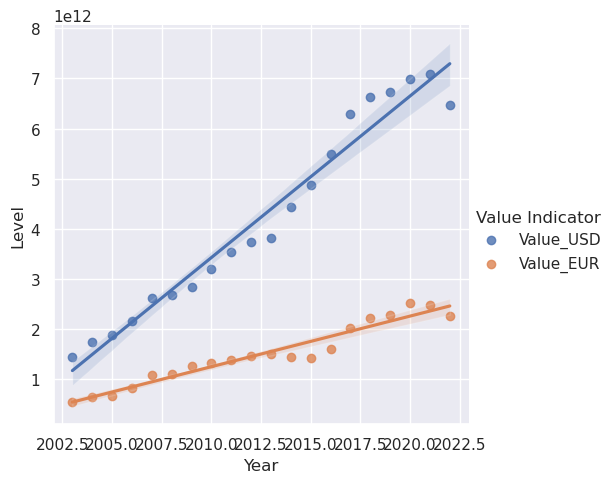

In [15]:
sns.set(rc={'figure.figsize':(40,25)})
sns.lmplot(
    data=df_panel,
    x="Year", y="Level", hue="Value Indicator",
    height=5
)